<a href="https://colab.research.google.com/github/ohrosi/China/blob/main/China_economy_stock_index_raw_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

SSE Composite Index
https://finance.yahoo.com/quote/000001.SS/history?p=000001.SS

SZSE COMPOSITE INDEX
https://finance.yahoo.com/quote/399106.SZ/components?p=399106.SZ

HANG SENG INDEX
https://finance.yahoo.com/quote/%5EHSI?p=%5EHSI


HANG SENG CHINA ENTERPRISES IND (^HSCE)
https://finance.yahoo.com/quote/%5EHSCE?p=%5EHSCE

In [43]:
SSE_url = 'https://query1.finance.yahoo.com/v7/finance/download/000001.SS?period1=867801600&period2=1624320000&interval=1d&events=history&includeAdjustedClose=true'

HSI_url = 'https://query1.finance.yahoo.com/v7/finance/download/%5EHSI?period1=536371200&period2=1624320000&interval=1d&events=history&includeAdjustedClose=true'

HSCE_url = 'https://query1.finance.yahoo.com/v7/finance/download/%5EHSCE?period1=742694400&period2=1624320000&interval=1d&events=history&includeAdjustedClose=true'


In [44]:
file_path = tf.keras.utils.get_file(
    origin=SSE_url,
    fname= 'SSE_url.csv'
    )

df_SSE = pd.read_csv(file_path)
df_SSE

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-07-02,1255.909058,1261.571045,1147.331055,1199.061035,1199.061035,0.0
1,1997-07-03,1194.676025,1194.676025,1149.939941,1150.623047,1150.623047,0.0
2,1997-07-04,1138.921021,1163.249023,1124.776001,1159.342041,1159.342041,0.0
3,1997-07-07,1161.707031,1163.447021,1085.572021,1096.818970,1096.818970,0.0
4,1997-07-08,1092.798950,1115.432983,1066.043945,1109.666016,1109.666016,0.0
...,...,...,...,...,...,...,...
5972,2021-06-15,3587.469971,3592.949951,3547.189941,3556.560059,3556.560059,349200.0
5973,2021-06-16,3556.709961,3561.090088,3513.560059,3518.330078,3518.330078,312600.0
5974,2021-06-17,3508.320068,3534.199951,3507.350098,3525.600098,3525.600098,277200.0
5975,2021-06-18,3520.500000,3535.620117,3503.179932,3525.100098,3525.100098,296700.0


In [45]:
df_SSE = df_SSE.rename(columns={"Open":"Open_SSE",
                       "High":"High_SSE",
                       "Low":"Low_SSE",
                       "Close":"Close_SSE",
                       "Adj Close":"AdjClose_SSE",
                       "Volume":"Volume_SSE"})

In [46]:
file_path = tf.keras.utils.get_file(
    origin=HSI_url,
    fname= 'HSI_url.csv'
    )

df_HSI = pd.read_csv(file_path)
df_HSI.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0
1,1987-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0
3,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0
4,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0


In [47]:
df_HSI = df_HSI.rename(columns={"Open":"Open_HSI",
                       "High":"High_HSI",
                       "Low":"Low_HSI",
                       "Close":"Close_HSI",
                       "Adj Close":"AdjClose_HSI",
                       "Volume":"Volume_HSI"})

In [48]:
file_path = tf.keras.utils.get_file(
    origin=HSCE_url,
    fname= 'HSCE_url.csv'
    )

df_HSCE = pd.read_csv(file_path)
df_HSCE.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-07-15,3964.649902,3964.649902,3964.649902,3964.649902,3964.649902,0.0
1,1993-07-16,3909.590088,3909.590088,3909.590088,3909.590088,3909.590088,0.0
2,1993-07-19,3771.939941,3771.939941,3771.939941,3771.939941,3771.939941,0.0
3,1993-07-20,3771.939941,3771.939941,3771.939941,3771.939941,3771.939941,0.0
4,1993-07-21,3854.530029,3854.530029,3854.530029,3854.530029,3854.530029,0.0


In [49]:
df_HSCE = df_HSCE.rename(columns={"Open":"Open_HSCE",
                       "High":"High_HSCE",
                       "Low":"Low_HSCE",
                       "Close":"Close_HSCE",
                       "Adj Close":"AdjClose_HSCE",
                       "Volume":"Volume_HSCE"})

In [50]:
df_concat = pd.concat([df_SSE, df_HSI, df_HSCE], )

In [51]:
df = pd.merge(pd.merge(df_SSE, df_HSI, how='outer', on='Date', sort=True), df_HSCE, how='outer', on='Date', sort=True)

In [52]:
df.head().transpose()

,0,1,2,3,4
Date,1986-12-31,1987-01-01,1987-01-02,1987-01-05,1987-01-06
Open_SSE,NaN,NaN,NaN,NaN,NaN
High_SSE,NaN,NaN,NaN,NaN,NaN
Low_SSE,NaN,NaN,NaN,NaN,NaN
Close_SSE,NaN,NaN,NaN,NaN,NaN
AdjClose_SSE,NaN,NaN,NaN,NaN,NaN
Volume_SSE,NaN,NaN,NaN,NaN,NaN
Open_HSI,2568.3,NaN,2540.1,2552.4,2583.9
High_HSI,2568.3,NaN,2540.1,2552.4,2583.9
Low_HSI,2568.3,NaN,2540.1,2552.4,2583.9


In [53]:
df.tail().transpose()

,8877,8878,8879,8880,8881
Date,2021-06-15,2021-06-16,2021-06-17,2021-06-18,2021-06-21
Open_SSE,3587.47,3556.71,3508.32,3520.5,3515.5
High_SSE,3592.95,3561.09,3534.2,3535.62,3540.3
Low_SSE,3547.19,3513.56,3507.35,3503.18,3504.01
Close_SSE,3556.56,3518.33,3525.6,3525.1,3529.18
AdjClose_SSE,3556.56,3518.33,3525.6,3525.1,3529.18
Volume_SSE,349200,312600,277200,296700,280900
Open_HSI,28946.4,28609.4,28240.9,28586,28501.6
High_HSI,28946.4,28648.6,28558.6,28830.8,28590.2
Low_HSI,28453.5,28403.6,28216.1,28532.1,28314.9


In [54]:
df.isna().sum()

Date                0
Open_SSE         3077
High_SSE         3077
Low_SSE          3077
Close_SSE        3077
AdjClose_SSE     3077
Volume_SSE       3077
Open_HSI          376
High_HSI          376
Low_HSI           376
Close_HSI         376
AdjClose_HSI      376
Volume_HSI        376
Open_HSCE        2042
High_HSCE        2042
Low_HSCE         2042
Close_HSCE       2042
AdjClose_HSCE    2042
Volume_HSCE      2042
dtype: int64

In [55]:
date_time = pd.to_datetime(df['Date'], format='%Y-%m-%d')

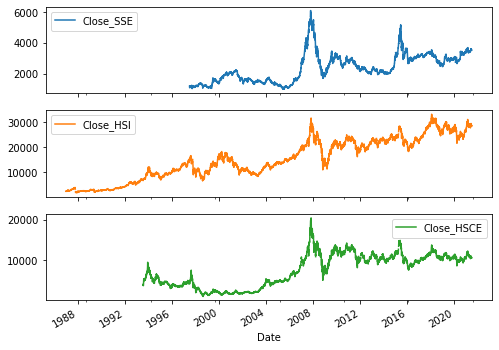

In [56]:
plot_cols = ['Close_SSE', 'Close_HSI', 'Close_HSCE']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

In [57]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)

In [58]:
day = 24*60*60
year = (365.2425)*day

df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

In [59]:
df.head().transpose()

,0,1,2,3,4
Date,1986-12-31,1987-01-01,1987-01-02,1987-01-05,1987-01-06
Open_SSE,NaN,NaN,NaN,NaN,NaN
High_SSE,NaN,NaN,NaN,NaN,NaN
Low_SSE,NaN,NaN,NaN,NaN,NaN
Close_SSE,NaN,NaN,NaN,NaN,NaN
AdjClose_SSE,NaN,NaN,NaN,NaN,NaN
Volume_SSE,NaN,NaN,NaN,NaN,NaN
Open_HSI,2568.3,NaN,2540.1,2552.4,2583.9
High_HSI,2568.3,NaN,2540.1,2552.4,2583.9
Low_HSI,2568.3,NaN,2540.1,2552.4,2583.9


Text(0.5, 1.0, 'Time of year signal')

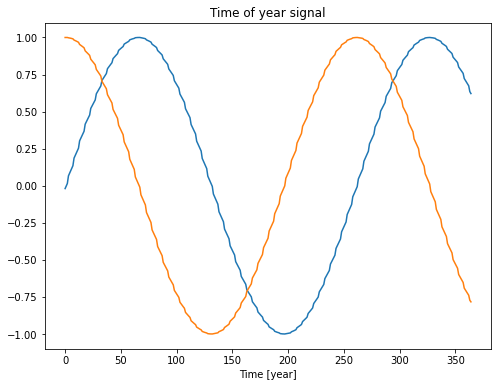

In [60]:
plt.plot(np.array(df['Year sin'])[:365])
plt.plot(np.array(df['Year cos'])[:365])
plt.xlabel('Time [year]')
plt.title('Time of year signal')

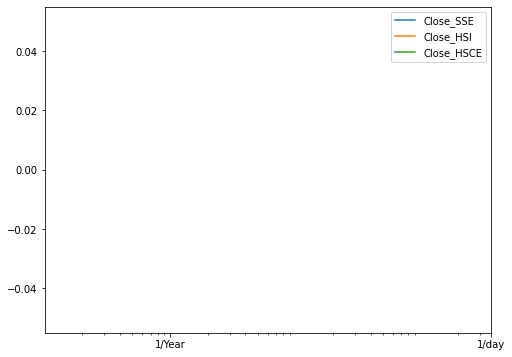

In [61]:
labels = []
target = 'Close_SSE'
fft = tf.signal.rfft(df[target])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df[target])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
labels.append(target)

target = 'Close_HSI'
fft = tf.signal.rfft(df[target])
plt.step(f_per_year, np.abs(fft))
labels.append(target)

target = 'Close_HSCE'
fft = tf.signal.rfft(df[target])
plt.step(f_per_year, np.abs(fft))
labels.append(target)

plt.xscale('log')
#plt.ylim(0, 900000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
plt.legend(labels)
